In [1]:
# In a notebook cell (prefix with !)
!pip install pandas matplotlib seaborn textblob nltk wordcloud vaderSentiment
# For TextBlob, download corpora (run in Python cell)
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
import pandas as pd

df = pd.read_csv('Student_Satisfaction_Survey.csv')   # or the path in Drive
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Student_Satisfaction_Survey.csv'

In [9]:
from google.colab import files
uploaded = files.upload()


Saving Student_Satisfaction_Survey.csv to Student_Satisfaction_Survey (1).csv


In [11]:
import pandas as pd
try:
    df = pd.read_csv('Student_Satisfaction_Survey.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('Student_Satisfaction_Survey.csv', encoding='latin1')
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [12]:
# Split "Average/ Percentage" into two separate numeric columns
df[['Average', 'Percentage']] = df['Average/ Percentage'].str.split('/', expand=True)

# Remove unwanted spaces and convert to numeric
df['Average'] = pd.to_numeric(df['Average'].str.strip(), errors='coerce')
df['Percentage'] = pd.to_numeric(df['Percentage'].str.replace('%', '').str.strip(), errors='coerce')

# Drop rows that are empty or irrelevant
df = df.dropna(subset=['Questions', 'Average'])
df.head()


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,Average,Percentage
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.0,60.0
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,5.0,100.0
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,5.0,100.0
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.0,60.0
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,4.0,80.0


In [13]:
print("Total questions:", df['Questions'].nunique())
print("Average rating overall:", round(df['Average'].mean(), 2))
print("Average percentage overall:", round(df['Percentage'].mean(), 2))



Total questions: 20
Average rating overall: 3.84
Average percentage overall: 76.86


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


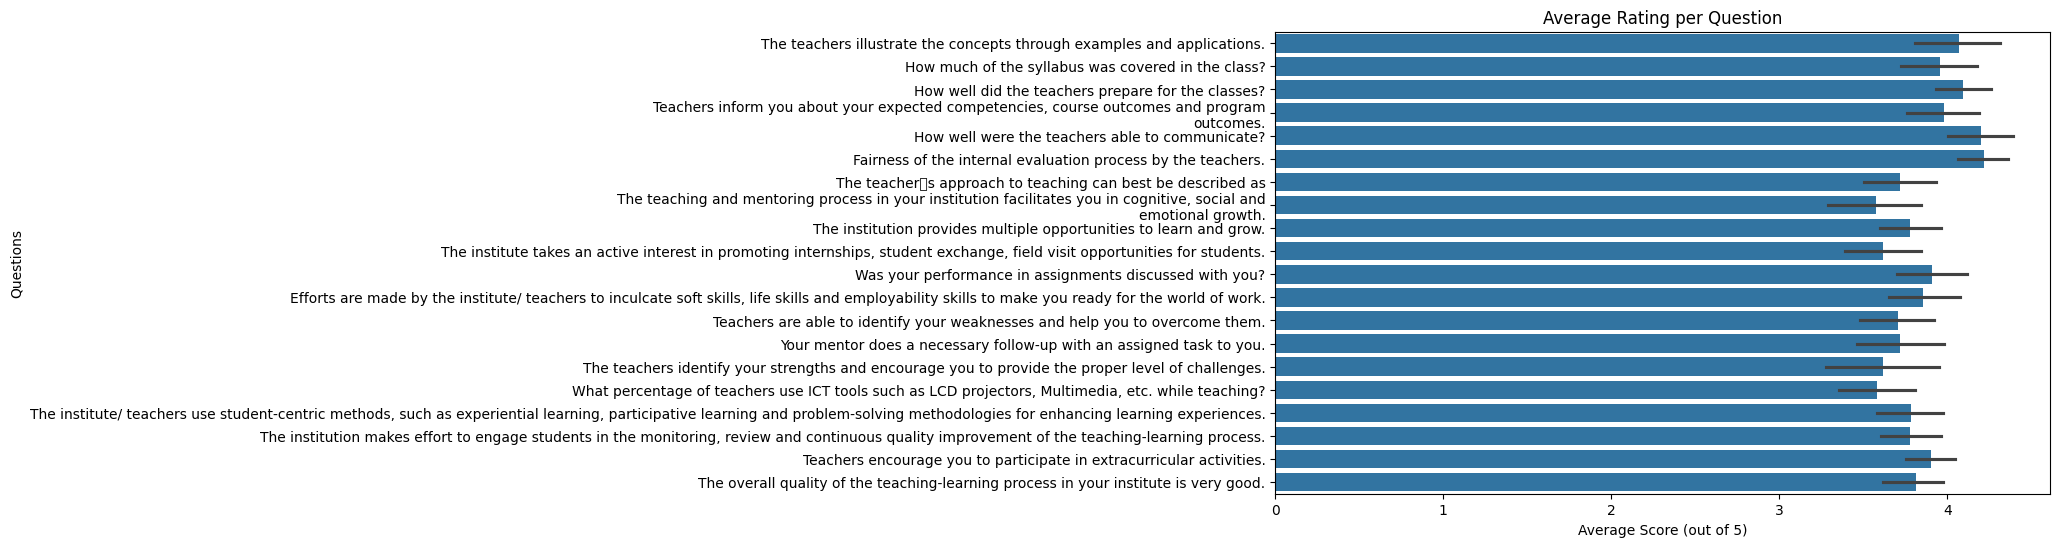

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='Average', y='Questions', data=df.sort_values('Average', ascending=False))
plt.title('Average Rating per Question')
plt.xlabel('Average Score (out of 5)')
plt.ylabel('Questions')
plt.show()


In [17]:
avg_by_course = df.groupby([' Course Name', 'Basic Course'])[['Average', 'Percentage']].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Average', y=' Course Name', data=avg_by_course)
plt.title('Average Feedback Score by Course')
plt.xlabel('Average Score (out of 5)')
plt.ylabel('Course Name')
plt.show()

KeyError: 'Course Name'

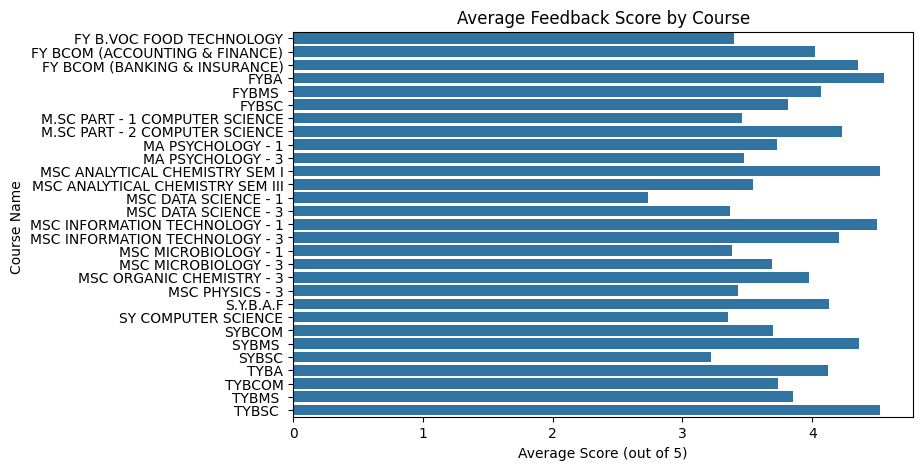

In [19]:
avg_by_course = df.groupby(['Course Name ', 'Basic Course'])[['Average', 'Percentage']].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Average', y='Course Name ', data=avg_by_course)
plt.title('Average Feedback Score by Course')
plt.xlabel('Average Score (out of 5)')
plt.ylabel('Course Name ')
plt.show()


In [20]:
low_scores = df[df['Average'] < 3.5][['Questions', 'Average', 'Percentage']]
print("Questions needing improvement:")
display(low_scores)


Questions needing improvement:


,Questions,Average,Percentage
0,How much of the syllabus was covered in the cl...,3.00,60.00
3,The teachers approach to teaching can best be...,3.00,60.00
6,The institute takes an active interest in prom...,3.00,60.00
7,The teaching and mentoring process in your ins...,2.00,40.00
9,Teachers inform you about your expected compet...,3.00,60.00
...,...,...,...
499,The overall quality of the teaching-learning p...,3.37,67.41
535,The institute/ teachers use student-centric me...,3.41,68.21
538,What percentage of teachers use ICT tools such...,3.26,65.13
550,Your mentor does a necessary follow-up with an...,2.00,40.00


In [21]:
summary = {
    'Total Questions': df['Questions'].nunique(),
    'Overall Average Rating': round(df['Average'].mean(), 2),
    'Overall Average Percentage': round(df['Percentage'].mean(), 2),
    'Lowest Rated Question': df.loc[df['Average'].idxmin(), 'Questions'],
    'Highest Rated Question': df.loc[df['Average'].idxmax(), 'Questions']
}

for k, v in summary.items():
    print(f"{k}: {v}")


Total Questions: 20
Overall Average Rating: 3.84
Overall Average Percentage: 76.86
Lowest Rated Question: The teaching and mentoring process in your institution facilitates you in cognitive, social and
emotional growth.
Highest Rated Question: How well did the teachers prepare for the classes?


/tmp/ipython-input-3508199895.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average', y='Questions', data=df.sort_values('Average', ascending=False), palette='coolwarm')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


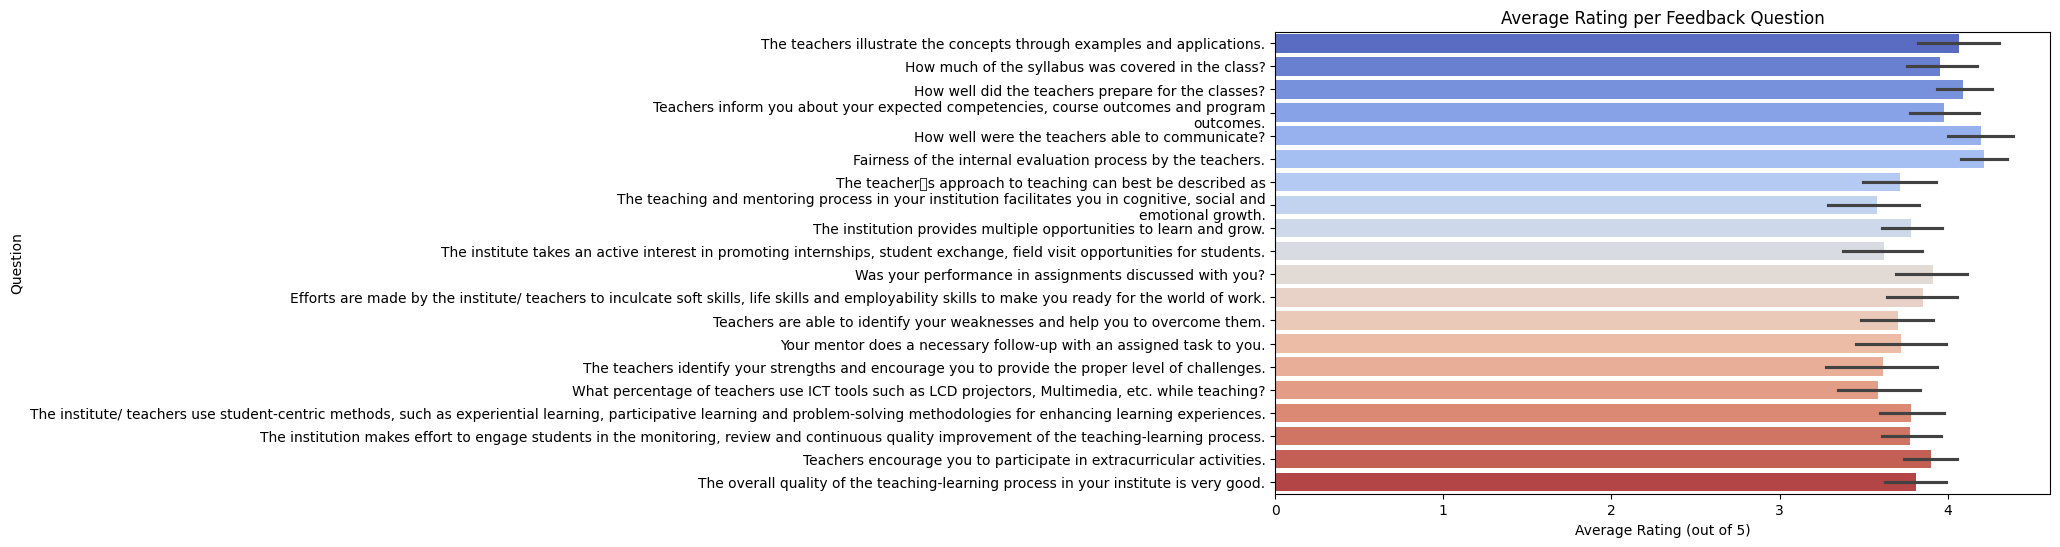

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='Average', y='Questions', data=df.sort_values('Average', ascending=False), palette='coolwarm')
plt.title('Average Rating per Feedback Question')
plt.xlabel('Average Rating (out of 5)')
plt.ylabel('Question')
plt.show()


/tmp/ipython-input-1297124820.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(rating_counts.keys()), y=list(rating_counts.values()), palette='magma')


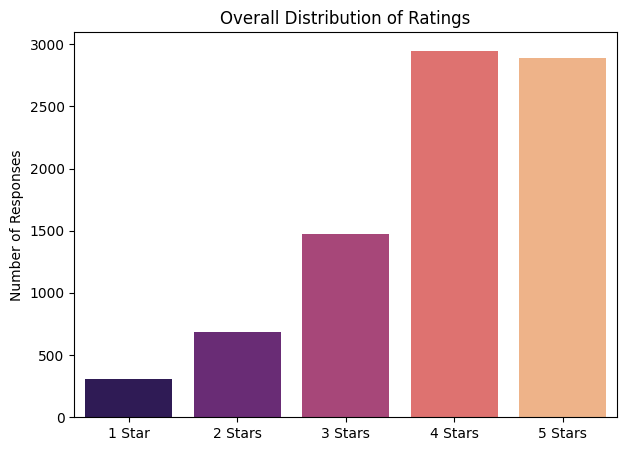

In [23]:
rating_counts = {
    '1 Star': df['Weightage 1'].sum(),
    '2 Stars': df['Weightage 2'].sum(),
    '3 Stars': df['Weightage 3'].sum(),
    '4 Stars': df['Weightage 4'].sum(),
    '5 Stars': df['Weightage 5'].sum()
}

plt.figure(figsize=(7,5))
sns.barplot(x=list(rating_counts.keys()), y=list(rating_counts.values()), palette='magma')
plt.title('Overall Distribution of Ratings')
plt.ylabel('Number of Responses')
plt.show()


/tmp/ipython-input-2851889600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_by_course.values, y=avg_by_course.index, palette='viridis')


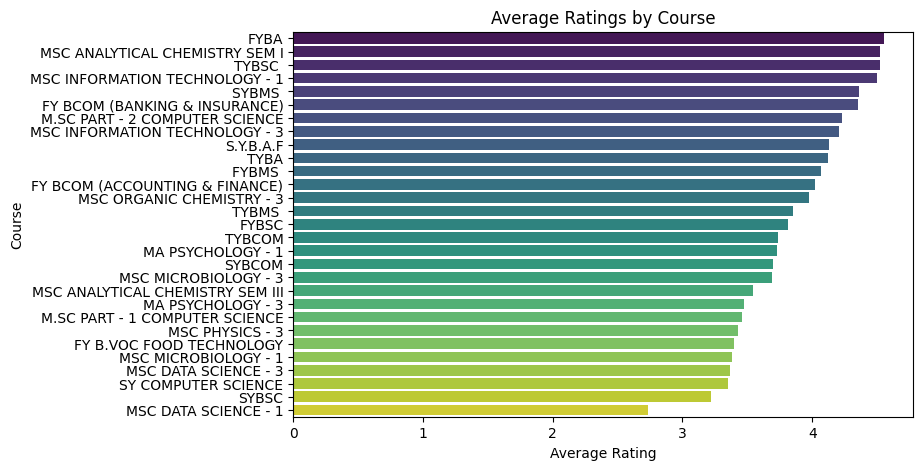

In [25]:
avg_by_course = df.groupby(' Course Name')['Average'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=avg_by_course.values, y=avg_by_course.index, palette='viridis')
plt.title('Average Ratings by Course')
plt.xlabel('Average Rating')
plt.ylabel('Course')
plt.show()

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment_Label', data=df, palette='Set2')
plt.title('Sentiment Distribution of Student Comments')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Comments')
plt.show()


ValueError: Could not interpret value `Sentiment_Label` for `x`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

In [29]:
# ==============================
# 🎓 STUDENT EVENT FEEDBACK ANALYSIS
# ==============================

# ✅ STEP 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Enable inline plotting
%matplotlib inline

# ✅ STEP 2: Load Data
# Replace with your file path
df = pd.read_csv('Student_Satisfaction_Survey.csv')
df.head()

# ✅ STEP 3: Basic Cleaning
# Strip column names & remove extra spaces
df.columns = df.columns.str.strip()

# Extract numeric value from "Average/ Percentage"
df['Average'] = df['Average/ Percentage'].astype(str).str.extract(r'(\d+\.\d+)').astype(float)

# ✅ STEP 4: Graphs of Ratings
plt.figure(figsize=(10,6))
sns.barplot(x='Average', y='Questions', data=df.sort_values('Average', ascending=False), palette='viridis')
plt.title("Average Rating per Feedback Question", fontsize=14)
plt.xlabel("Average Rating (out of 5)")
plt.ylabel("Feedback Questions")
plt.show()

# Overall Rating Distribution
rating_counts = {
    '1 Star': df['Weightage 1'].sum(),
    '2 Stars': df['Weightage 2'].sum(),
    '3 Stars': df['Weightage 3'].sum(),
    '4 Stars': df['Weightage 4'].sum(),
    '5 Stars': df['Weightage 5'].sum()
}

plt.figure(figsize=(7,5))
sns.barplot(x=list(rating_counts.keys()), y=list(rating_counts.values()), palette='coolwarm')
plt.title("Overall Rating Distribution")
plt.ylabel("Number of Responses")
plt.show()

# ✅ STEP 5: Average Ratings by Course
avg_by_course = df.groupby('Course Name ')['Average'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=avg_by_course.values, y=avg_by_course.index, palette='mako')
plt.title("Average Ratings by Course")
plt.xlabel("Average Rating")
plt.ylabel("Course Name ")
plt.show()

# ✅ STEP 6: Sentiment Analysis (if Comments exist)
if 'Comments' in df.columns:
    analyzer = SentimentIntensityAnalyzer()
    def get_sentiment(text):
        if not isinstance(text, str): return 0
        return analyzer.polarity_scores(text)['compound']
    df['Sentiment_Score'] = df['Comments'].apply(get_sentiment)
    df['Sentiment_Label'] = df['Sentiment_Score'].apply(
        lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral')
    )

    # Sentiment Distribution
    plt.figure(figsize=(6,4))
    sns.countplot(x='Sentiment_Label', data=df, palette='Set2')
    plt.title("Sentiment Distribution of Student Comments")
    plt.xlabel("Sentiment Category")
    plt.ylabel("Number of Comments")
    plt.show()

    print("📊 Sentiment Summary (%):")
    print((df['Sentiment_Label'].value_counts(normalize=True)*100).round(2))
else:
    print("⚠️ No 'Comments' column found. Skipping sentiment analysis.")

# ✅ STEP 7: Identify Low-Rated Questions
low_rated = df[df['Average'] < 3.5][['Questions','Average']]
print("\n⚠️ Questions Needing Improvement (Rating < 3.5):")
display(low_rated)

# ✅ STEP 8: Recommendations Summary
print("\n💡 Key Recommendations:")
print("""
1. Focus training on questions with <3.5 average rating.
2. Improve mentoring process and fairness of evaluation.
3. Maintain strengths (questions scoring >4.0).
4. Encourage interactive teaching methods based on sentiment feedback.
5. Regularly monitor ratings and collect qualitative feedback.
""")


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 562: invalid start byte

In [30]:
# Calculate average rating per event
avg_ratings = df.groupby('Event Name')['Rating'].mean().sort_values(ascending=False)


KeyError: 'Event Name'

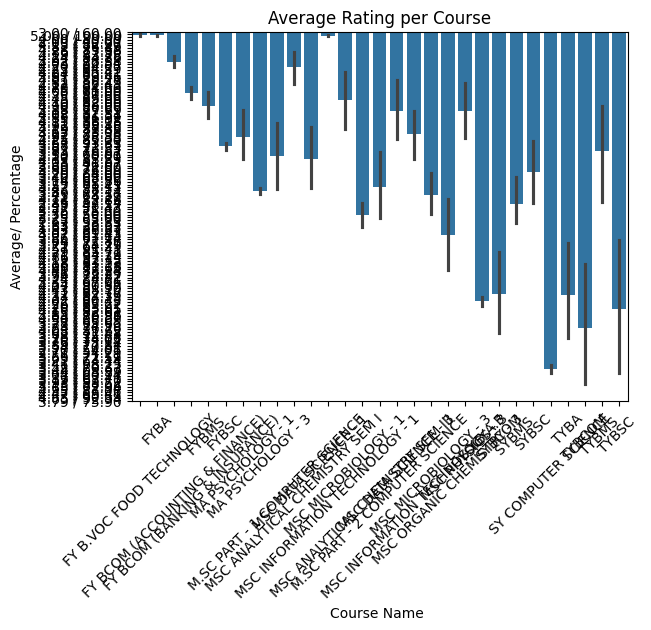

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Course Name ', y='Average/ Percentage', data=df)
plt.xticks(rotation=45)
plt.title('Average Rating per Course')
plt.show()
